As said in the data description, it is skewed i.e. classes are highlyimbalanced, class-1 i.e. fraud transactions are very few. For us, model sensitivity (TP/Actual Positive) and precision (TP/predicted positive) are really important metrics.

I will use "Naive Bayes" that is simple but powerful algorithm for predictive modeling and classification.

Let me start with a brief intro to Bayes' Theorm (that I learnt from Jason's ML book on algorithms (https://machinelearningmastery.com/master-machine-learning-algorithms/) ):

P(h|d) = P(d|h)*P(h) / P(d)

, where P(h|d) is "posterior probability" = prob. of hypothesis h for given data d, P(d|h) is the prob. of data d given hypothesis h is true, P(h) "prior prob of h" being true regardless of data, P(d) prob. of data regardless of hypo.

Calculate posterior prob. for a number of hypo., select the one with highest prob. This maximum probable hypothesis is called MAP (maximum a posteriori): MAP(h) = max(P(h|d)) or max(P(d|h)P(h)) / P(d) or max(P(d|h)P(h)),

( given P(d) is constant, only used for normalization, so can be dropped).

Strong assumption: all the features are independent of each other => P(d1|h) P(d2|h) ... so on

A learned naive bayes model stores a list of probabilities:

1. prob. for each class in the training dataset: class prob.
2. the conditional prob. for each input value given each class value: cond. prob.

Note that training is fast because it saves only prob. values listed above, no coeffi. need to be fitted by optimization procedures.

Gaussian Naive Bayes:

real-valued attributes estimated by assuming a Gaussian distribution.
easiest to work with, only need mean and std from training data
calculate mean and std of input values(X) for each class to summarize the distribution.

Data Dictionary:
Time = Number of seconds elapsed between this transaction and the first transaction in the dataset
V1 = may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28 = abc
Amount = Transaction amount
Class = 1 for fraudulent transactions, 0 otherwise

In [33]:
import numpy as np
import pandas as pd
#no need for import below, doing at per visualization level to control colors of each chart
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
# Data Handling: Load CSV
df = pd.read_csv("../credit_card_fraud_detection/creditcard.csv")

# Get to know list of features, data shape, stat. description.
print(df.shape)

(284807, 31)


In [34]:
print("First 5 lines:")
print(df.head(5))

First 5 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [35]:
print("describe: ")
print(df.describe())

describe: 
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+

In [36]:
print("info: ")
print(df.info())

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float6

Class as pie chart:


Text(0, 0.5, '')

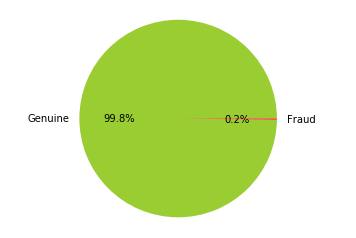

In [37]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [38]:
# Count distribution of Class variable (0 = Genuine & 1 = Fraud)
print("Counts of Class variable")
print(df.Class.value_counts())

Counts of Class variable
0    284315
1       492
Name: Class, dtype: int64


Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


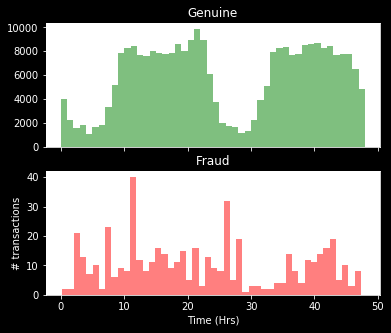

In [40]:
# Plot Time to see if there is any trend
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))

import matplotlib.pyplot as plt
# Changes the axis, tick marks, and axis units to white for my dark filter browser
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'}):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,5))
    ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
    ax1.set_title('Genuine',color='w')
    ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
    ax2.set_title('Fraud',color='w')
    plt.xlabel('Time (Hrs)',color='w')
    plt.ylabel('# transactions',color='w')

# Change axis colors to white for dark mode browser
for ax, color in zip([ax1, ax2], ['w', 'w', 'w', 'w']):
    plt.setp(ax.spines.values(), color=color)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)

This "Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes. So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse I will later test this assumption. For now, I'll keep this feature in data frame. I will drop "Time" but keep "Time_Hr".

In [41]:
# Drop Time and keep Time_Hr df
df = df.drop(['Time'],axis=1)

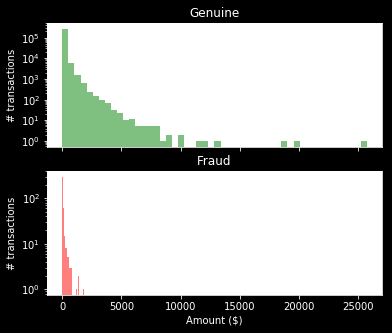

In [42]:
# Check another feature: Amount
import matplotlib.pyplot as plt
# Changes the axis, tick marks, and axis units to white for my dark filter browser
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'}):
    fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,5), sharex = True)
    ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
    ax3.set_yscale('log') # to see the tails
    ax3.set_title('Genuine',color='w') # to see the tails
    ax3.set_ylabel('# transactions',color='w')
    ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
    ax4.set_yscale('log') # to see the tails
    ax4.set_title('Fraud',color='w') # to see the tails
    ax4.set_xlabel('Amount ($)',color='w')
    ax4.set_ylabel('# transactions',color='w')

# Change axis colors to white for dark mode browser
for ax, color in zip([ax3, ax4], ['w', 'w', 'w', 'w']):
    plt.setp(ax.spines.values(), color=color)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)

Interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use.

In [27]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

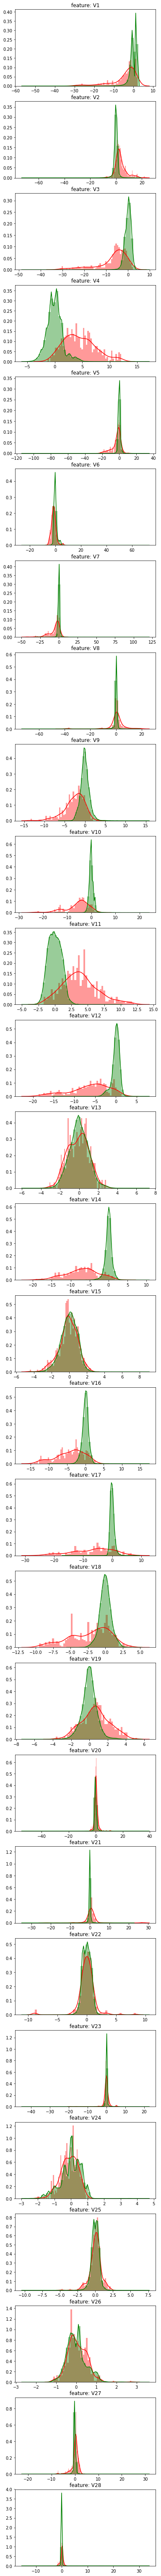

In [43]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

# Change axis colors to white for dark mode browser
for ax, color in zip([ax5], ['w', 'w', 'w', 'w']):
    plt.setp(ax.spines.values(), color=color)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)

For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

Now, it's time to split the data in test set (20%) and training set (80%). I'll define a function for it.